# Unroll bargaining, compare curves of different models

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append("..")

In [3]:
from utils import parse_outputs_v2

## Define functions

In [4]:
def reshape_and_filter_price(prices):
    prices_ = []
    for p in prices:
        p_ = []
        for pi in p:
            if(pi > 10 and pi < 20): p_.append(pi)
            else: break
        if(len(p_) > 0): prices_.append(p_)

    prices_reshape = [[], [], [], [], []]
    for p in prices_:
        for pi, p_ in enumerate(p):
            prices_reshape[pi].append(p_)
    return prices_reshape

In [112]:
def draw_compare_curve(prices, labels=None, prices_std=None, figsize=(4,2), 
                       ylim=(10,20), hline=False, legend_loc='lower right'):
    """draw the compare curve"""

    # Create a bar plot using Matplotlib
    plt.figure(figsize=figsize, dpi=250)

    markers = {"gpt-4": 'o', 
               "gpt-3.5": 's', 
               "claude-instant": 'v', 
               "claude-v": 'h'}
    colors = {"gpt-4": '#1f77b4',
                "gpt-3.5": '#ff7f0e',
                "claude-instant": '#2ca02c',
                "claude-v": '#9467bd'}
    
    def _label_to_marker_and_color(label):
        if("gpt-4" in label): 
            return markers["gpt-4"], colors["gpt-4"], "gpt-4"
        elif("gpt-3.5" in label): 
            return markers["gpt-3.5"], colors["gpt-3.5"], "gpt-3.5"
        elif("claude-instant" in label): 
            return markers["claude-instant"], colors["claude-instant"], "claude-instant-v1.0"
        elif("claude-v" in label): 
            return markers["claude-v"], colors["claude-v"], "claude-v1.3"
        else: return 'o'

    if(prices_std is None): prices_std = [None] * len(prices)
    for pi, li, pi_std in zip(prices, labels, prices_std):
        marker, color, label = _label_to_marker_and_color(li)
        plt.plot(np.arange(1, 6), pi, linewidth=1, label=label, marker=marker, markersize=5, color=color, zorder=10)
        if(hline):
            plt.axhline(y=0.5, color='tab:gray', linestyle='--', linewidth=1, alpha=0.5, zorder=5)
        if(pi_std is not None):
            plt.errorbar(np.arange(1, 6), pi, yerr=pi_std, linewidth=1, label=li, marker='o', markersize=3)

    # Display the plot
    plt.legend(loc='upper left', fontsize=8, bbox_to_anchor=(1.05, 1))
    # plt.legend(loc=legend_loc, fontsize=6)

    plt.ylim(ylim)
    plt.show()
    return


## Read the outputs from the file

In [5]:
gpt_3_5_seller = parse_outputs_v2("../outputs/criticize_seller_200_runs_5_rollout_ver_0.3.0.0.txt")
gpt_3_5_seller = reshape_and_filter_price(gpt_3_5_seller)

gpt_3_5_buyer = parse_outputs_v2("../outputs/criticize_buyer_200_runs_5_rollout_ver_0.3.1.0.txt")
gpt_3_5_buyer = reshape_and_filter_price(gpt_3_5_buyer)

gpt_4_seller = parse_outputs_v2("../outputs/criticize_seller_200_runs_5_rollout_ver_0.3.4.0.txt")
gpt_4_seller = reshape_and_filter_price(gpt_4_seller)

gpt_4_buyer = parse_outputs_v2("../outputs/criticize_buyer_200_runs_5_rollout_ver_0.3.5.0.txt")
gpt_4_buyer = reshape_and_filter_price(gpt_4_buyer)

In [7]:
claude_instant_v1_0_seller = parse_outputs_v2("../outputs/criticize_seller_200_runs_5_rollout_ver_0.3.2.0.txt")
claude_instant_v1_0_seller = reshape_and_filter_price(claude_instant_v1_0_seller)

claude_instant_v1_0_buyer = parse_outputs_v2("../outputs/criticize_buyer_200_runs_5_rollout_ver_0.3.3.0.txt")
claude_instant_v1_0_buyer = reshape_and_filter_price(claude_instant_v1_0_buyer)

claude_v1_3_seller = parse_outputs_v2("../outputs/criticize_seller_200_runs_5_rollout_ver_0.3.6.0.txt")
claude_v1_3_seller = reshape_and_filter_price(claude_v1_3_seller)

claude_v1_3_buyer = parse_outputs_v2("../outputs/criticize_buyer_200_runs_5_rollout_ver_0.3.7.0.txt")
claude_v1_3_buyer = reshape_and_filter_price(claude_v1_3_buyer)

In [ ]:
gpt_3_5_seller_price = [np.average(p) for p in gpt_3_5_seller]
gpt_3_5_buyer_price = [np.average(p) for p in gpt_3_5_buyer]
gpt_4_seller_price = [np.average(p) for p in gpt_4_seller]
gpt_4_buyer_price = [np.average(p) for p in gpt_4_buyer]
claude_instant_v1_0_seller_price = [np.average(p) for p in claude_instant_v1_0_seller]
claude_instant_v1_0_buyer_price = [np.average(p) for p in claude_instant_v1_0_buyer]
claude_v1_3_seller_price = [np.average(p) for p in claude_v1_3_seller]
claude_v1_3_buyer_price = [np.average(p) for p in claude_v1_3_buyer]

In [82]:
gpt_3_5_seller_price_std = [np.std(p) for p in gpt_3_5_seller]
gpt_3_5_buyer_price_std = [np.std(p) for p in gpt_3_5_buyer]
gpt_4_seller_price_std = [np.std(p) for p in gpt_4_seller]
gpt_4_buyer_price_std = [np.std(p) for p in gpt_4_buyer]
claude_instant_v1_0_seller_price_std = [np.std(p) for p in claude_instant_v1_0_seller]
claude_instant_v1_0_buyer_price_std = [np.std(p) for p in claude_instant_v1_0_buyer]
claude_v1_3_seller_price_std = [np.std(p) for p in claude_v1_3_seller]
claude_v1_3_buyer_price_std = [np.std(p) for p in claude_v1_3_buyer]

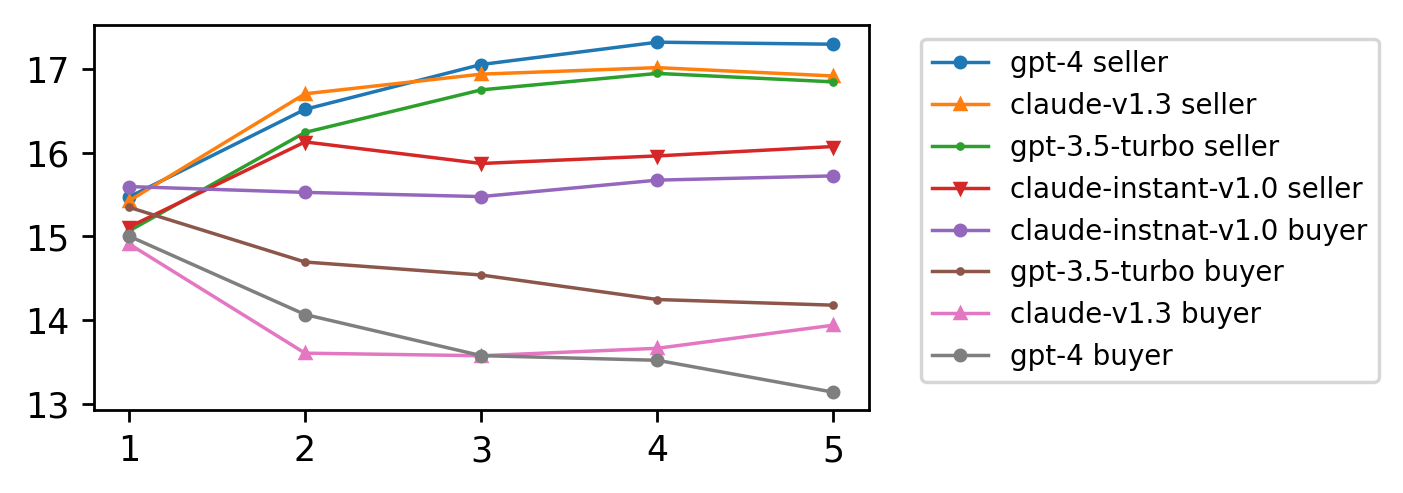

In [41]:
prices = [gpt_3_5_seller_price, gpt_4_seller_price, gpt_3_5_buyer_price, gpt_4_buyer_price, 
          claude_instant_v1_0_seller_price, claude_instant_v1_0_buyer_price, claude_v1_3_seller_price, claude_v1_3_buyer_price]
labels = ["gpt-3.5-turbo seller", "gpt-4 seller", "gpt-3.5-turbo buyer", "gpt-4 buyer", 
          "claude-instant-v1.0 seller", "claude-instant-v1.0 buyer", "claude-v1.3 seller", "claude-v1.3 buyer"]

ranks = ["gpt-4 seller", "claude-v1.3 seller", "gpt-3.5-turbo seller", "claude-instant-v1.0 seller",
         "claude-instnat-v1.0 buyer", "gpt-3.5-turbo buyer", "claude-v1.3 buyer", "gpt-4 buyer"]
reranked_prices = [gpt_4_seller_price, claude_v1_3_seller_price, gpt_3_5_seller_price, claude_instant_v1_0_seller_price,
                     claude_instant_v1_0_buyer_price, gpt_3_5_buyer_price, claude_v1_3_buyer_price, gpt_4_buyer_price]
draw_compare_curve(reranked_prices, ranks)

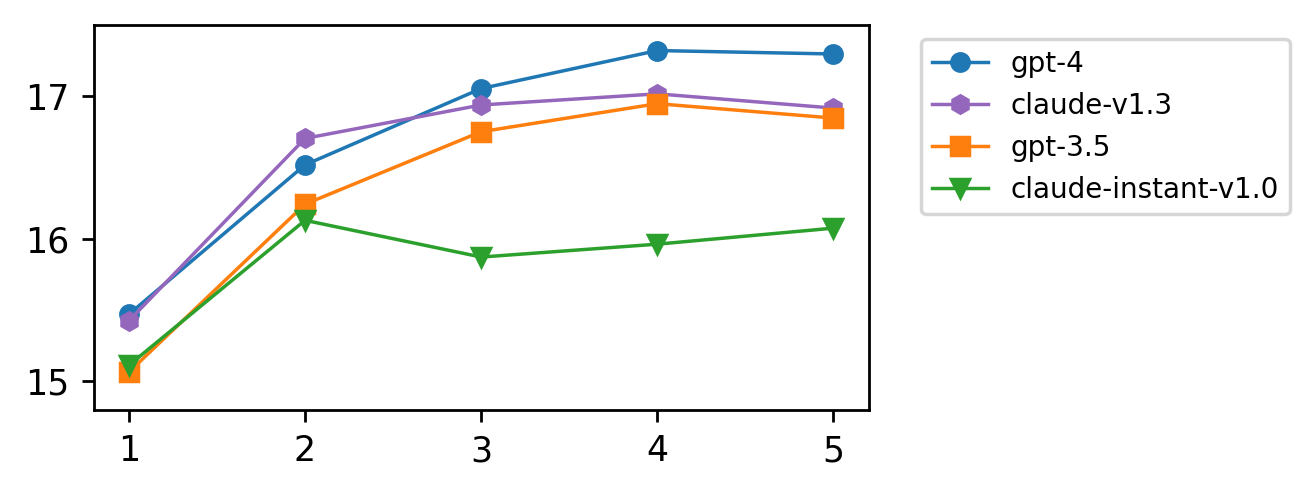

In [99]:
ranks = ["gpt-4 seller", "claude-v1.3 seller", "gpt-3.5-turbo seller", "claude-instant-v1.0 seller"]
reranked_prices = [gpt_4_seller_price, claude_v1_3_seller_price, 
                   gpt_3_5_seller_price, claude_instant_v1_0_seller_price]
reranked_prices_std = [gpt_4_seller_price_std, claude_v1_3_seller_price_std, 
                       gpt_3_5_seller_price_std, claude_instant_v1_0_seller_price_std]
draw_compare_curve(reranked_prices, ranks, ylim=(14.8, 17.5))

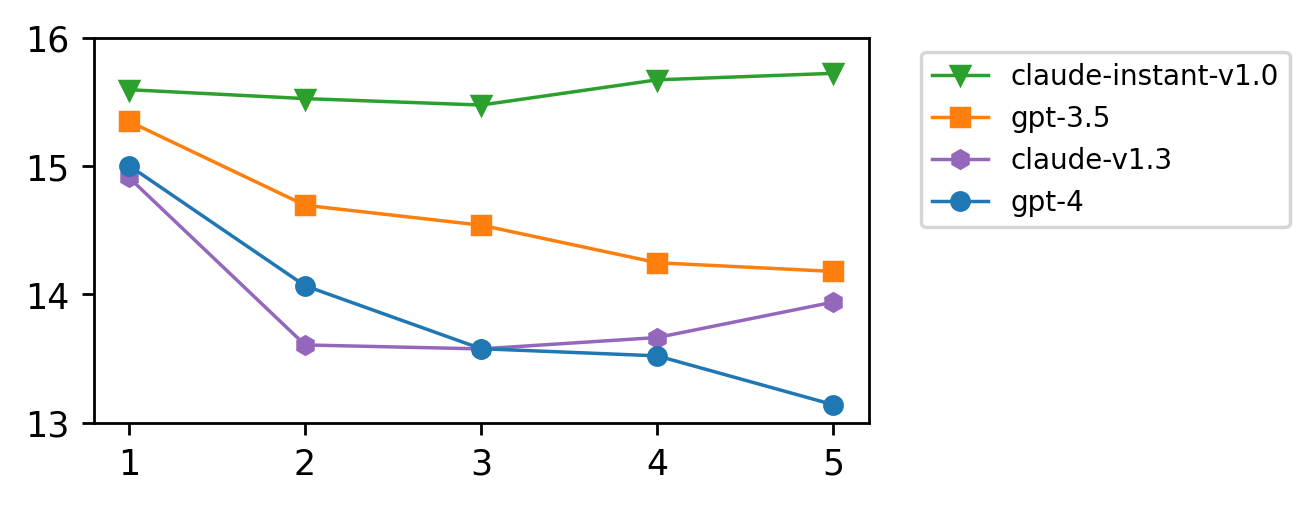

In [100]:
ranks = ["claude-instant-v1.0 buyer", "gpt-3.5-turbo buyer", "claude-v1.3 buyer", "gpt-4 buyer"]
reranked_prices = [claude_instant_v1_0_buyer_price, gpt_3_5_buyer_price, claude_v1_3_buyer_price, gpt_4_buyer_price]
draw_compare_curve(reranked_prices, ranks, ylim=(13, 16))

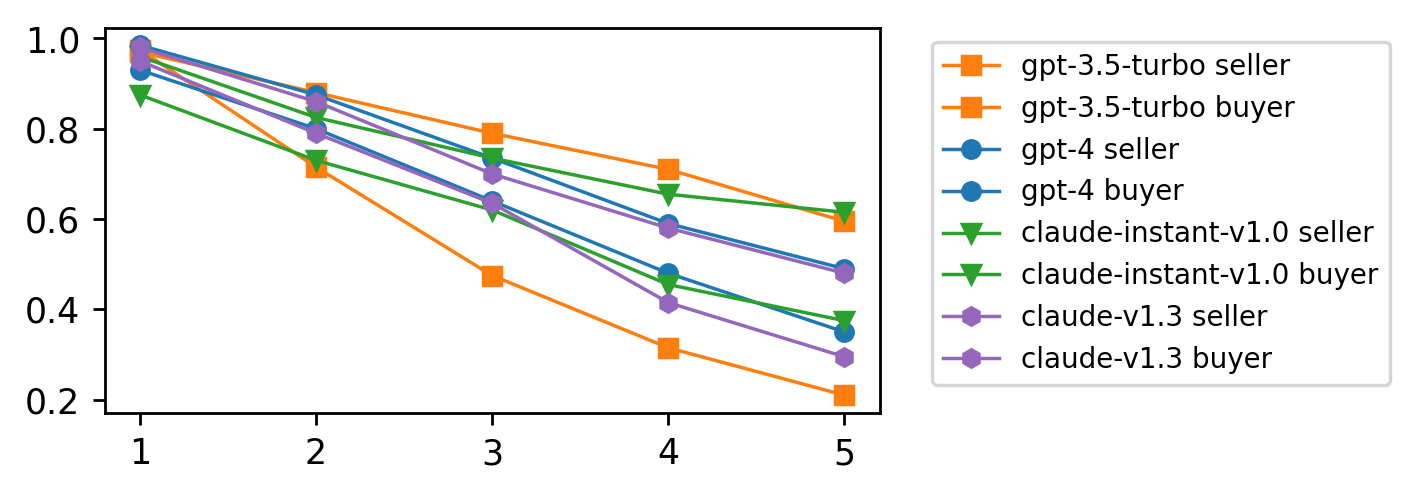

In [68]:
gpt_3_5_seller_sr = [len(p) / 200 for p in gpt_3_5_seller]
gpt_3_5_buyer_sr = [len(p) / 200 for p in gpt_3_5_buyer]
gpt_4_seller_sr = [len(p) / 200 for p in gpt_4_seller]
gpt_4_buyer_sr = [len(p) / 200 for p in gpt_4_buyer]
claude_instant_v1_0_seller_sr = [len(p) / 200 for p in claude_instant_v1_0_seller]
claude_instant_v1_0_buyer_sr = [len(p) / 200 for p in claude_instant_v1_0_buyer]
claude_v1_3_seller_sr = [len(p) / 200 for p in claude_v1_3_seller]
claude_v1_3_buyer_sr = [len(p) / 200 for p in claude_v1_3_buyer]

sr = [gpt_3_5_seller_sr, gpt_4_seller_sr, gpt_3_5_buyer_sr, gpt_4_buyer_sr,
        claude_instant_v1_0_seller_sr, claude_instant_v1_0_buyer_sr, claude_v1_3_seller_sr, claude_v1_3_buyer_sr]
labels = ["gpt-3.5-turbo seller",  "gpt-3.5-turbo buyer", "gpt-4 seller", "gpt-4 buyer", 
          "claude-instant-v1.0 seller", "claude-instant-v1.0 buyer", "claude-v1.3 seller", "claude-v1.3 buyer"]
draw_compare_curve(sr, labels)

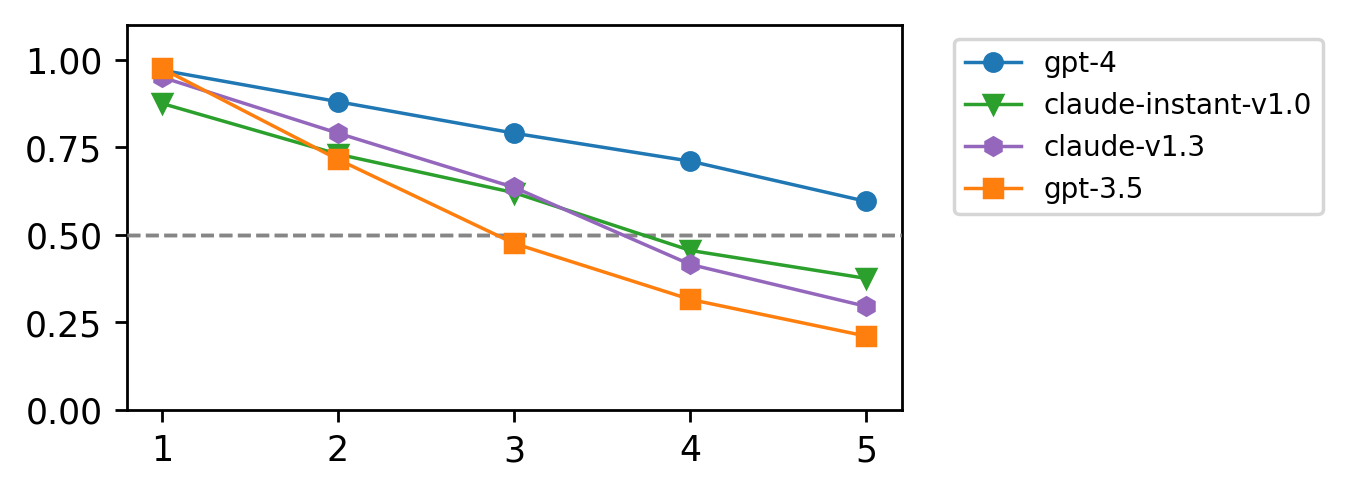

In [115]:
sr = [gpt_4_seller_sr, claude_instant_v1_0_seller_sr, claude_v1_3_seller_sr, gpt_3_5_seller_sr]
ranks = ["gpt-4 seller", "claude-instant-v1.0 seller", "claude-v1.3 seller", "gpt-3.5-turbo seller"]
draw_compare_curve(sr, ranks, ylim=(0, 1.1), hline=True)

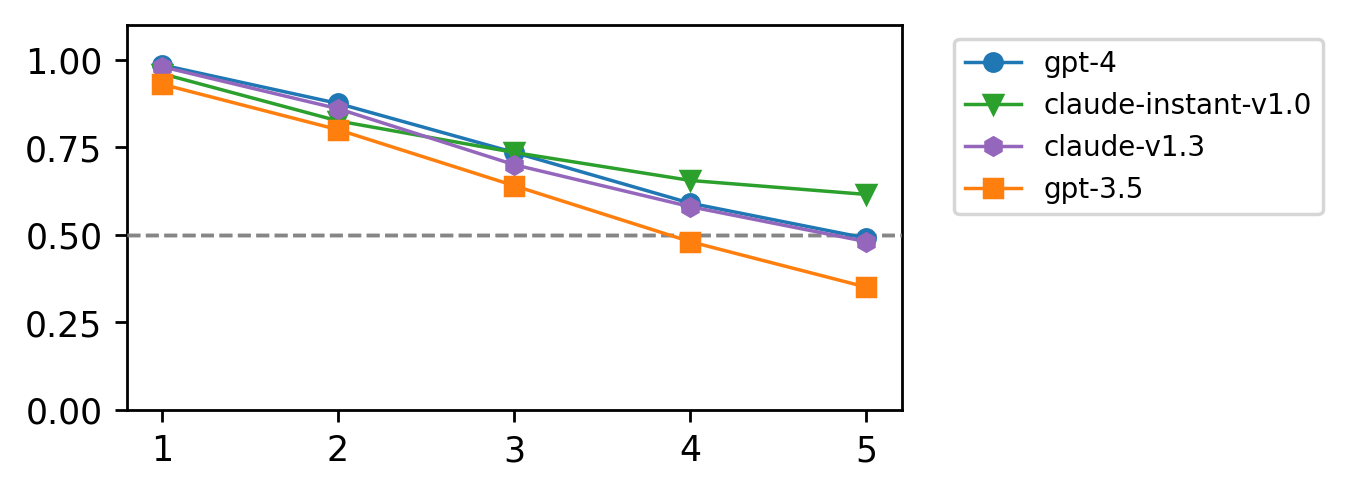

In [113]:
sr = [gpt_4_buyer_sr, claude_instant_v1_0_buyer_sr, claude_v1_3_buyer_sr, gpt_3_5_buyer_sr]
ranks = ["gpt-4 buyer", "claude-instant-v1.0 buyer", "claude-v1.3 buyer", "gpt-3.5-turbo buyer"]
draw_compare_curve(sr, ranks, ylim=(0, 1.1), hline=True)